## An Introduction to Portfolio Optimization in Python

In investing, portfolio optimization is the task of selecting assets such that the return on investment is maximized while the risk is minimized.

In each of these cases, the task of optimizing assets involves balancing the trade-offs between risk and return, where return on a stock is the profits realized after a period of time and risk is the standard deviation in an asset's value. Many of the available methods of portfolio optimization are essentially extensions of diversification methods for assets in investing. The idea here is that having a portfolio of different types of assets is less risky than having ones that are similar.

Finding the right methods for portfolio optimization is an important part of the work done by investment banks and asset management firms. One of the early methods is called mean variance optimization, which was developed by Harry Markowitz and, consequently, is also called the Markowitz Method or the HM method. 

The method works by assuming investors are risk-averse. Specifically, it selects a set of assets that are least correlated (i.e., different from each other) and that generate the highest returns. This approach means that, given a set of portfolios with the same returns, you will select the portfolio with assets that have the least statistical relationship to one another.

For example, instead of selecting a portfolio of tech company stocks, you should pick a portfolio with stocks across disparate industries. In practice, the mean variance optimization algorithm may select a portfolio containing assets in tech, retail, healthcare and real estate instead of a single industry like tech. Although this is a fundamental approach in modern portfolio theory, it has many limitations such as assuming that historical returns completely reflect future returns.

Additional methods like hierarchical risk parity (HRP) and mean conditional value at risk (mCVAR) address some of the limitations of the mean variance optimization method. Specifically, HRP does not require inverting of a covariance matrix, which is a measure of how stock returns move in the same direction. The mean variance optimization method requires finding the inverse of the covariance matrix, however, which is not always computationally feasible.

Further, the mCVAR method does not make the assumption that mean variance optimization makes, which happens when returns are normally distributed. Since mCVAR doesn’t assume normally distributed returns, it is not as sensitive to extreme values like mean variance optimization. This means that if a stock has an anomalous increase in price, mCVAR will be more robust than mean variance optimization and will be better suited for asset allocation. Conversely, mean variance optimization may naively suggest we disproportionately invest most of our resources in an asset that has an anomalous increase in price.

The Python package PyPortfolioOpt provides a wide variety of features that make implementing all these methods straightforward.
- Mean Variance Optimization
- Hierarchical Risk Parity (HRP)
- Mean Conditional Value at Risk (mCVAR)

There are several many python libraries that suppors portfolio optimization. However, we use PyPortfolioOpt herein.
    
PyPortfolioOpt can be installed using command:
- pip install PyPortfolioOpt

In [4]:
import pandas as pd
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [9]:
import yfinance as yf

In [25]:
companyList_1 = [ "PFE", "JNJ", "GOOGL", "FB", "AAPL", "COST", "WMT", "KR", "JPM", "BAC"]
companyList_2 = ['GOOG', 'AAPL', 'BABA', 'AMZN', 'GE', 'AMD', 'WMT', 'BAC', 'GM', 'T', 'UAA', 'XOM', 'RRC', 'BBY', 'MA', 'PFE', 'JPM', 'SBUX']

Construction of the data table
- Here we use the close prices of all the stock prices
- Duration 1 year


In [29]:
historical_prices_df = pd.DataFrame()

In [30]:
for ticker_id in companyList_2:
    ticker = yf.Ticker(ticker_id)
    historical_prices_df[ticker_id] = ticker.history('6mo')['Close']

In [50]:
historical_prices_df.head()

,GOOG,AAPL,BABA,AMZN,GE,AMD,WMT,BAC,GM,T,UAA,XOM,RRC,BBY,MA,PFE,JPM,SBUX
Date,,,,,,,,,,,,,,,,,,
2023-12-28 00:00:00-05:00,141.119415,193.071426,75.597015,153.380005,102.228363,148.759995,52.164497,33.439625,35.998123,16.205858,8.95,98.467644,30.686291,76.738998,425.060364,27.941795,168.274734,94.638283
2023-12-29 00:00:00-05:00,140.769806,192.024185,75.861275,151.940002,101.678658,147.410004,52.190979,33.232353,35.719685,16.244583,8.79,98.261261,30.298109,76.562943,425.249847,27.941795,168.077118,94.717209
2024-01-02 00:00:00-05:00,139.401367,185.152283,73.169769,149.929993,100.340256,138.580002,52.733913,33.459366,35.848957,16.699585,8.68,100.600334,30.656431,75.565323,420.643494,28.854101,170.033569,92.408707
2024-01-03 00:00:00-05:00,140.200455,183.765945,74.960838,148.470001,98.834557,135.320007,52.737221,33.094173,35.073311,16.680222,8.18,101.445564,30.845545,73.775467,417.532684,28.854101,169.292496,91.974640
2024-01-04 00:00:00-05:00,137.883087,181.432098,73.071899,144.570007,99.312561,136.009995,52.227398,33.360664,35.292084,16.602776,7.94,100.561028,30.148809,73.648315,418.529724,28.232958,170.415939,92.290329


<Axes: xlabel='Date'>

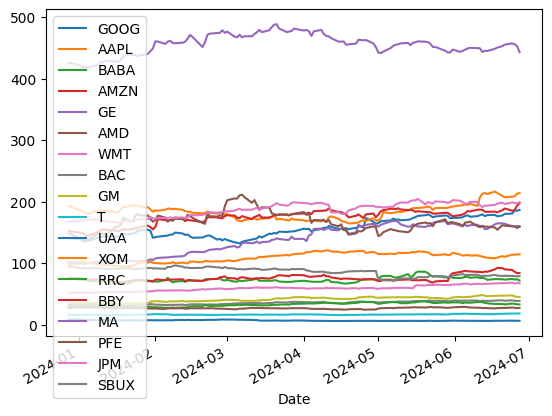

In [51]:
historical_prices_df.plot()

In [35]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(historical_prices_df)
S = risk_models.sample_cov(historical_prices_df)


In [37]:
mu

GOOG    0.769263
AAPL    0.233803
BABA   -0.084841
AMZN    0.677650
GE      1.501075
AMD     0.151754
WMT     0.707744
BAC     0.384844
GM      0.615456
T       0.344935
UAA    -0.419250
XOM     0.368406
RRC     0.196621
BBY     0.211013
MA      0.086393
PFE    -0.010286
JPM     0.408547
SBUX   -0.303034
dtype: float64

In [39]:
S

,GOOG,AAPL,BABA,AMZN,GE,AMD,WMT,BAC,GM,T,UAA,XOM,RRC,BBY,MA,PFE,JPM,SBUX
GOOG,0.076775,0.019083,0.014640,0.033006,0.005018,0.033061,-0.000115,0.005291,0.000144,-0.001730,0.012427,-0.001429,0.007774,-0.001024,0.003723,0.004342,0.000747,0.010597
AAPL,0.019083,0.060428,0.018454,0.014891,0.006659,0.021777,0.000187,-0.001520,0.002435,-0.002442,0.014637,-0.003406,0.005491,0.017632,0.005413,0.003382,-0.006608,0.008574
BABA,0.014640,0.018454,0.129157,0.009515,0.002553,0.015597,0.016178,0.005017,0.011296,0.006514,0.029068,0.010209,0.020166,0.014699,0.010041,0.019189,0.009411,0.006991
AMZN,0.033006,0.014891,0.009515,0.061596,0.022915,0.045434,0.001360,-0.002418,0.003451,-0.009951,0.014971,-0.003060,0.001491,0.005557,0.006514,-0.001559,0.001337,-0.001709
GE,0.005018,0.006659,0.002553,0.022915,0.082118,0.037542,-0.001363,0.009998,0.021595,-0.002401,0.019628,0.001945,0.010398,0.016234,0.010660,-0.010862,0.010732,0.001443
AMD,0.033061,0.021777,0.015597,0.045434,0.037542,0.237053,-0.003718,0.004119,0.013155,-0.012247,0.014757,-0.003282,0.013943,0.022993,0.019143,-0.016155,0.014358,0.037658
WMT,-0.000115,0.000187,0.016178,0.001360,-0.001363,-0.003718,0.028050,0.004059,0.005123,0.003019,0.010399,0.001318,0.001814,0.003542,0.002374,0.002892,0.003313,0.007280
BAC,0.005291,-0.001520,0.005017,-0.002418,0.009998,0.004119,0.004059,0.041732,0.026031,0.012689,0.025780,0.012620,0.017218,0.020063,0.005218,0.013375,0.024152,0.009478
GM,0.000144,0.002435,0.011296,0.003451,0.021595,0.013155,0.005123,0.026031,0.065175,0.012217,0.026466,0.008517,0.021823,0.025208,0.010801,0.007000,0.019190,0.007191
T,-0.001730,-0.002442,0.006514,-0.009951,-0.002401,-0.012247,0.003019,0.012689,0.012217,0.037284,0.018313,0.008793,0.011248,0.013848,0.004524,0.016846,0.007260,0.002391


In [41]:
# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights.csv")  # saves to file
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict({'GOOG': 0.1358, 'AAPL': 0.0, 'BABA': 0.0, 'AMZN': 0.00291, 'GE': 0.27498, 'AMD': 0.0, 'WMT': 0.37475, 'BAC': 0.0, 'GM': 0.0, 'T': 0.10287, 'UAA': 0.0, 'XOM': 0.10869, 'RRC': 0.0, 'BBY': 0.0, 'MA': 0.0, 'PFE': 0.0, 'JPM': 0.0, 'SBUX': 0.0})
Expected annual return: 86.0%
Annual volatility: 11.4%
Sharpe Ratio: 7.39


(0.8599543143786224, 0.11366833285896805, 7.3895190793444705)

This is interesting but not useful in itself. However, PyPortfolioOpt provides a method which allows you to convert the above continuous weights to an actual allocation that you could buy. Just enter the most recent prices, and the desired portfolio size ($10,000 in this example):

In [43]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [54]:

latest_prices = get_latest_prices(historical_prices_df)

da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=10000)
allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'WMT': 55, 'GE': 17, 'GOOG': 7, 'XOM': 10, 'T': 55}
Funds remaining: $49.83


In [65]:
import matplotlib.pyplot as plt
from pypfopt import plotting
import numpy as np

D:\Program Files\Python312\Lib\site-packages\cvxpy\problems\problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


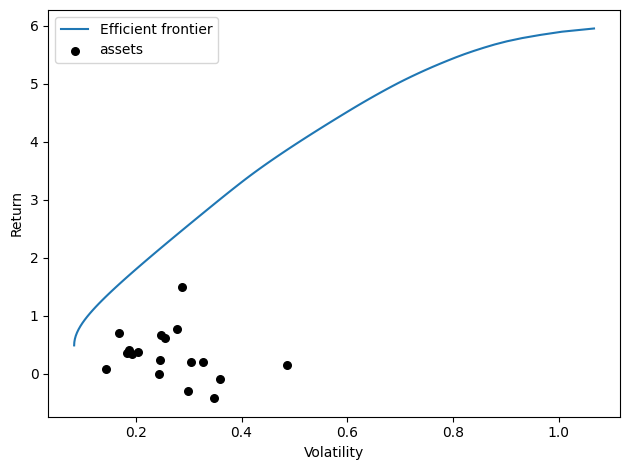

In [70]:
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.add_constraint(lambda w: w[0] >= 0)
#ef.add_constraint(lambda w: w[2] == 0.15)
#ef.add_constraint(lambda w: w[3] + w[4] <= 0.10)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()